In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

## profiling

In [2]:
metric = 'l2_tex_hit_rate'

In [3]:
#model = 'resnet50'
#model = 'resnet152'
model = 'vgg16'

In [4]:
onegpu = pd.read_csv('./src/'+model+'/l12hr_one.csv')
onegpu = onegpu.drop(0)
onegpu = onegpu.dropna(subset=[metric])
onegpu = onegpu.reset_index(drop=True)

multigpu = pd.read_csv('./src/'+model+'/l12hr_multi.csv')
multigpu = multigpu.drop(0)
multigpu = multigpu.dropna(subset=[metric])
multigpu = multigpu.reset_index(drop=True)


In [5]:
delimeter1 = find_delimeter(onegpu)
delimeter2 = find_delimeter(multigpu)

if delimeter1==delimeter2:
    delimeter = delimeter1
else:
    delimeter=int((delimeter1+delimeter2)/2)

In [ ]:
a = onegpu['Name'].to_numpy()
b = multigpu['Name'].to_numpy()

In [ ]:
_, idx_1, idx_4 = np.intersect1d(a,b,return_indices=True)

In [ ]:
idx_1 = np.sort(idx_1)
idx_4 = np.sort(idx_4)

In [6]:
val_1 = onegpu[metric].astype(float).to_numpy()
val_4 = multigpu[metric].astype(float).to_numpy()

In [ ]:
val_1 = val_1[idx_1]
val_4 = val_4[idx_4]

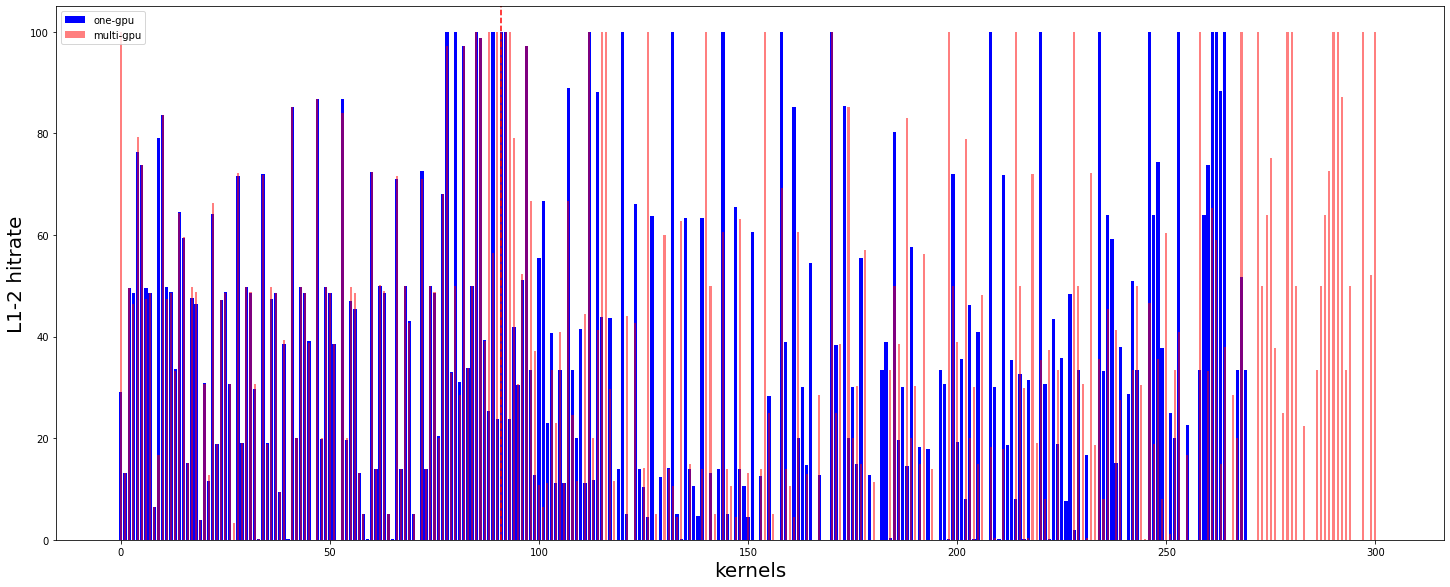

In [7]:
plot_bar_overlap(val_1, val_4, delimeter=delimeter, ylabel='L1-2 hitrate', xlabel='kernels', label1='one-gpu', label2='multi-gpu')